In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import json
import numpy as np

In [16]:
root = "/data/nicola/WSH/final_data/"
df = pd.read_json(root+"1_L1_spatial_based_train_data.json", orient="records")

In [17]:
spatial = pd.DataFrame()
species = pd.DataFrame()
num_sets = 1
for i in range(num_sets):
    for split in ["train", "test", "val"]:
        spatial = pd.concat([spatial, pd.read_json(root+f"{i+1}_L1_spatial_based_{split}_data.json", orient="records")])
spatial["num_species"] = spatial["species_key"].apply(lambda x : len(x))
spatial["num_labels"] = spatial["set_based_class"].apply(lambda x : sum(x))
for i in range(num_sets):
    for split in ["train", "test", "val"]:
        species = pd.concat([species, pd.read_json(root+f"{i+1}_L1_species_based_{split}_data.json", orient="records")])
species["num_species"] = species["species_key"].apply(lambda x : len(x))
species["num_labels"] = species["set_based_class"].apply(lambda x : sum(x))

In [18]:
spatial.num_species.value_counts()

10    3925
2     3687
3     2381
4     1588
1     1268
5     1191
6      867
7      740
8      537
9      454
Name: num_species, dtype: int64

In [19]:
len(spatial[spatial["num_species"]==1]["species_key"].apply(lambda x: x[0]).drop_duplicates())

1268

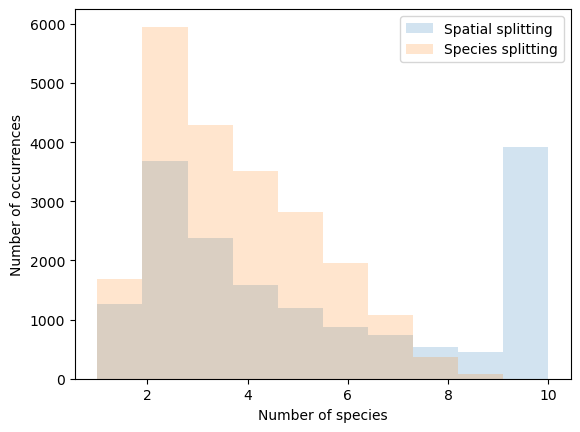

In [20]:
plt.figure()
histtype = "bar"
#plt.title("Number of species recorded in samples")
plt.hist(spatial["num_species"], alpha=0.2, histtype = histtype, bins=10)
plt.hist(species["num_species"], alpha=0.2, histtype = histtype, bins=10)
plt.xlabel("Number of species")
plt.ylabel("Number of occurrences")
plt.legend(["Spatial splitting","Species splitting"])

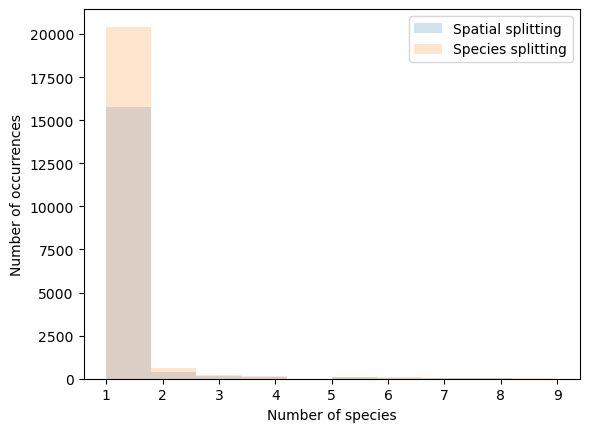

In [21]:
plt.figure()
histtype = "bar"
#plt.title("Number of species recorded in samples")
plt.hist(spatial["num_labels"], alpha=0.2, histtype = histtype)
plt.hist(species["num_labels"], alpha=0.2, histtype = histtype)
plt.xlabel("Number of species")
plt.ylabel("Number of occurrences")
plt.legend(["Spatial splitting","Species splitting"])

In [22]:
#occurrences = pd.read_json(root+"1_L1_habitats_keys.json")
occurrences = pd.DataFrame()
occurrences["Habitat"]= ["1 Open water", "2 Shorelines and wetlands", "3 Sand, gravel, stone, crushed stone", "4 Grasslands and meadows", "5 Heaths, margins and meadows", "6 Forests", "7 Pioneer vegetation in disturbed areas", "8 Plantations, fields and crops", "9 Built environments"]
occurrences["Spatial splitting"] = (np.array(spatial["set_based_class"].values.tolist()).sum(axis=0)/len(spatial)).tolist()
occurrences["Species splitting"] = (np.array(species["set_based_class"].values.tolist()).sum(axis=0)/len(species)).tolist()
occurrences
occurrences.set_index("Habitat").round(4).to_latex("occurrences_set_based.tex")

/tmp/ipykernel_1117036/445344840.py:7: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  occurrences.set_index("Habitat").round(4).to_latex("occurrences_set_based.tex")


In [23]:
#occurrences = pd.read_json(root+"1_L1_habitats_keys.json")
occurrences = pd.DataFrame()
occurrences["Habitat"]= ["1 Open water", "2 Shorelines and wetlands", "3 Sand, gravel, stone, crushed stone", "4 Grasslands and meadows", "5 Heaths, margins and meadows", "6 Forests", "7 Pioneer vegetation in disturbed areas", "8 Plantations, fields and crops", "9 Built environments"]
occurrences["Spatial splitting"] = (np.array(spatial["species_based_class"].values.tolist()).sum(axis=0)/len(spatial)).tolist()
occurrences["Species splitting"] = (np.array(species["species_based_class"].values.tolist()).sum(axis=0)/len(species)).tolist()
occurrences
occurrences.set_index("Habitat").round(4).to_latex("occurrences_species_based.tex")

/tmp/ipykernel_1117036/806341620.py:7: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  occurrences.set_index("Habitat").round(4).to_latex("occurrences_species_based.tex")


In [24]:
stats = pd.DataFrame(columns = ["Splitting","Train samples", "Val samples", "Test samples"])
for base in ["spatial","species"]:
    for i in range(5):
        new_row = [base]
        for split in ["train", "val", "test"]:
            df = pd.read_json(root+f"{i+1}_L1_{base}_based_{split}_data.json", orient="records")
            new_row.append(len(df))
        stats.loc[len(stats)] = new_row

base = "progressive"
for i in range(5):
    for frac in [0,10,20,30,40,50,60,70,80,90,100]:
        new_row = [base]
        for split in ["train", "val", "test"]:
            if split=="test":
                df = pd.read_json(root+f"{i+1}_L1_{base}_{split}_data.json", orient="records")
            else:
                df = pd.read_json(root+f"{i+1}_L1_{base}_{frac}%_{split}_data.json", orient="records")
            new_row.append(len(df))
        stats.loc[len(stats)] = new_row
stats

,Splitting,Train samples,Val samples,Test samples
0,spatial,10314,1628,4696
1,spatial,10309,1626,4676
2,spatial,10324,1624,4689
3,spatial,10324,1624,4689
4,spatial,10313,1625,4688
...,...,...,...,...
60,progressive,10023,1114,5255
61,progressive,10023,1114,5255
62,progressive,10023,1114,5255
63,progressive,10023,1114,5255


In [25]:
stats.groupby(["Splitting"]).mean().round().astype(int).to_latex("num_samples.tex")

/tmp/ipykernel_1117036/4117249505.py:1: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  stats.groupby(["Splitting"]).mean().round().astype(int).to_latex("num_samples.tex")


In [26]:
spatial = pd.DataFrame()
species = pd.DataFrame()
num_sets = 1
for i in range(num_sets):
    for split in ["train", "test", "val"]:
        spatial = pd.concat([spatial, pd.read_json(root+f"{i+1}_L2_spatial_based_{split}_data.json", orient="records")])
spatial["num_species"] = spatial["species_key"].apply(lambda x : len(x))
spatial["num_labels"] = spatial["set_based_class"].apply(lambda x : sum(x))
for i in range(num_sets):
    for split in ["train", "test", "val"]:
        species = pd.concat([species, pd.read_json(root+f"{i+1}_L2_species_based_{split}_data.json", orient="records")])
species["num_species"] = species["species_key"].apply(lambda x : len(x))
species["num_labels"] = species["set_based_class"].apply(lambda x : sum(x))

In [27]:
occurrences = pd.DataFrame()
occurrences["Habitat"]= pd.read_json(root+f"1_L2_habitats_keys.json", orient="records")["class"]
occurrences["Spatial splitting"] = (np.array(spatial["set_based_class"].values.tolist()).sum(axis=0)/len(spatial)).tolist()
occurrences["Species splitting"] = (np.array(species["set_based_class"].values.tolist()).sum(axis=0)/len(species)).tolist()
occurrences

,Habitat,Spatial splitting,Species splitting
0,11,0.013036,0.014892
1,12,0.021258,0.017726
2,21,0.006618,0.006647
3,22,0.013236,0.014429
4,23,0.003677,0.003762
5,24,0.000869,0.001031
6,31,0.000936,0.000721
7,32,0.010495,0.009585
8,33,0.041647,0.040297
9,34,0.033492,0.032000


In [28]:
occurrences = pd.DataFrame()
#occurrences["Habitat"]= ["1 Open water", "2 Shorelines and wetlands", "3 Sand, gravel, stone, crushed stone", "4 Grasslands and meadows", "5 Heaths, margins and meadows", "6 Forests", "7 Pioneer vegetation in disturbed areas", "8 Plantations, fields and crops", "9 Built environments"]
occurrences["Spatial splitting"] = (np.array(spatial["species_based_class"].values.tolist()).sum(axis=0)/len(spatial)).tolist()
occurrences["Species splitting"] = (np.array(species["species_based_class"].values.tolist()).sum(axis=0)/len(species)).tolist()
occurrences.describe()

,Spatial splitting,Species splitting
count,32.000000,32.000000
mean,0.185298,0.202420
std,0.214599,0.228973
min,0.000535,0.000412
25%,0.021308,0.021733
50%,0.087706,0.103241
75%,0.312421,0.352842
max,0.793168,0.809647
